# Part 1 : Clean the Data

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# check for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
# replace null values with their mean values
data['Pregnancies'].fillna(data['Pregnancies'].mean(), inplace = True)
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['Age'].fillna(data['Age'].mean(), inplace = True)

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# check for duplicate values
print(data.duplicated().value_counts())

False    768
dtype: int64


In [5]:
# checking whether data transformation is required
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Part 2: EDA

In [6]:
# check the structure of the dataset
data.shape

(768, 9)

In [7]:
# statistical summary of the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<Axes: >

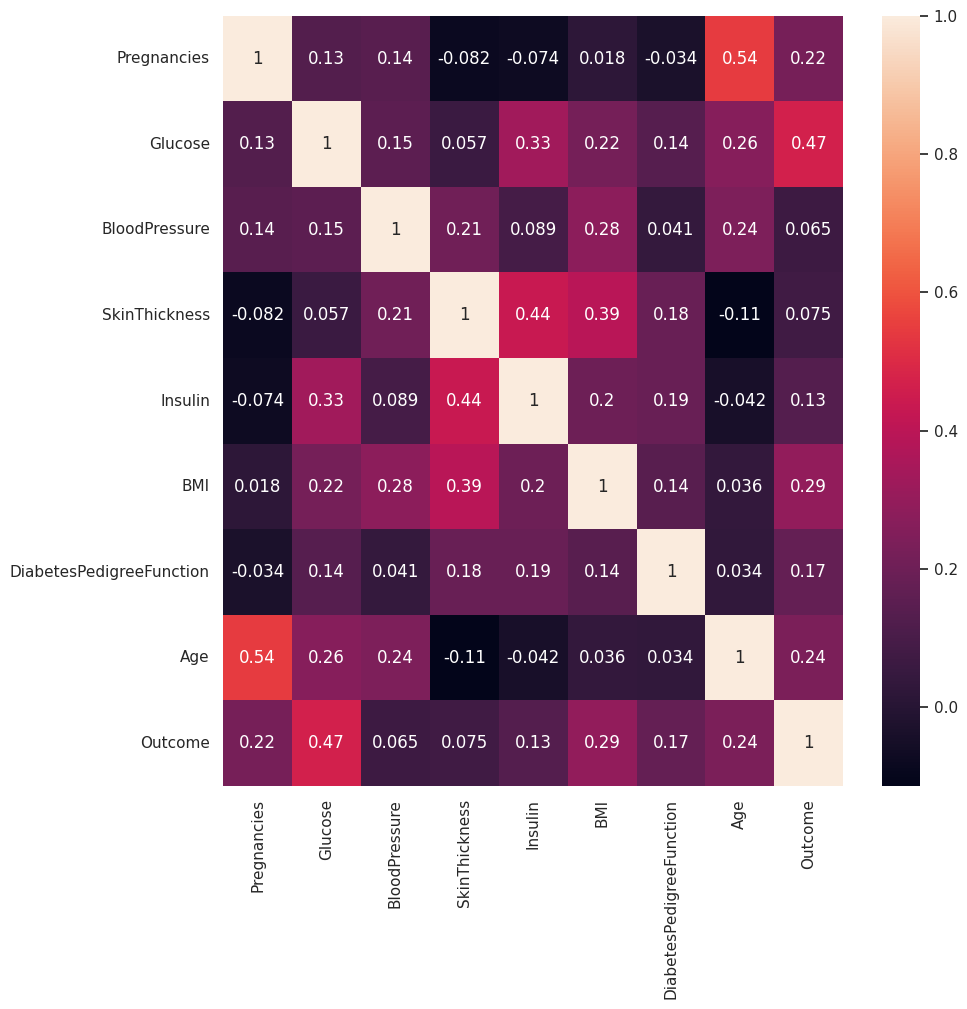

In [9]:
corr=data.corr()
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(corr, annot=True)

In [10]:
fig = px.bar(data['Age'].value_counts(), height=400, width = 700)
fig.show()

<ipython-input-11-abb7719b907d>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Glucose', ylabel='Density'>

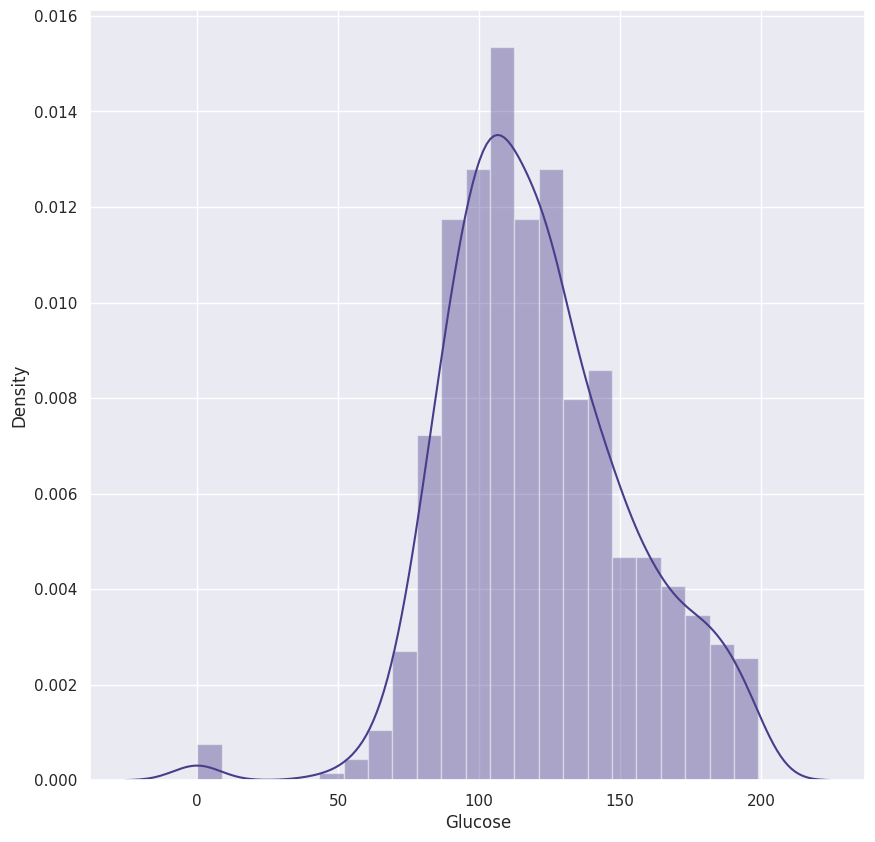

In [11]:
sns.distplot(data['Glucose'],color ="DarkSlateBlue" )

<ipython-input-12-012e23af502a>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='BloodPressure', ylabel='Density'>

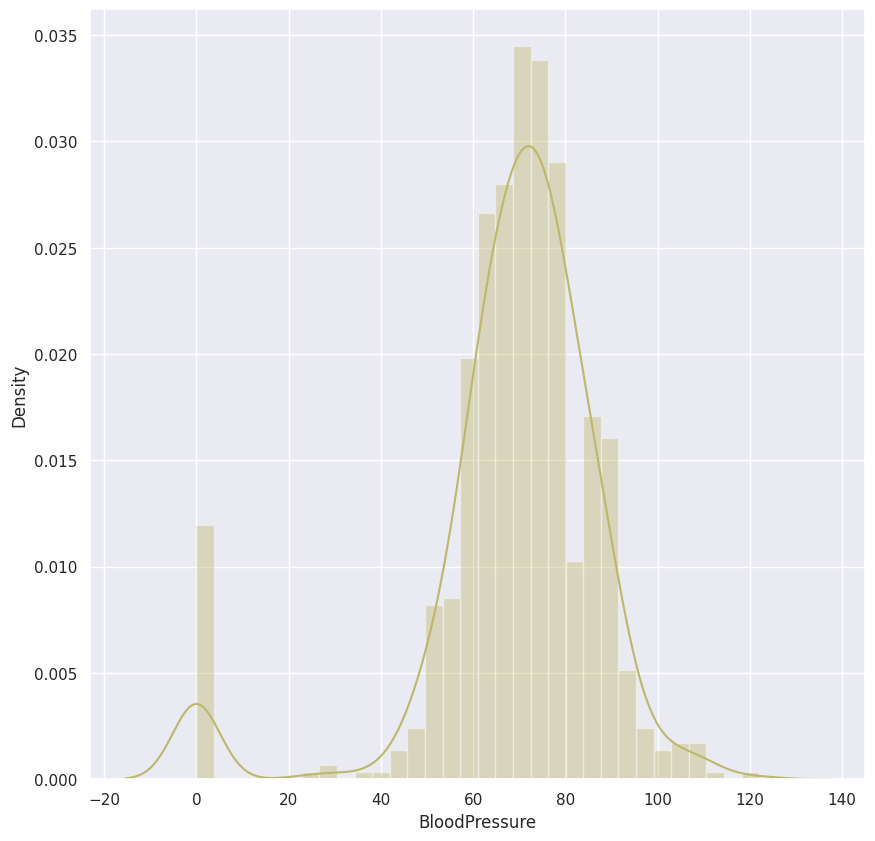

In [12]:

sns.distplot(data['BloodPressure'], color = 'DarkKhaki')

<ipython-input-13-ea712ab3bb62>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Insulin', ylabel='Density'>

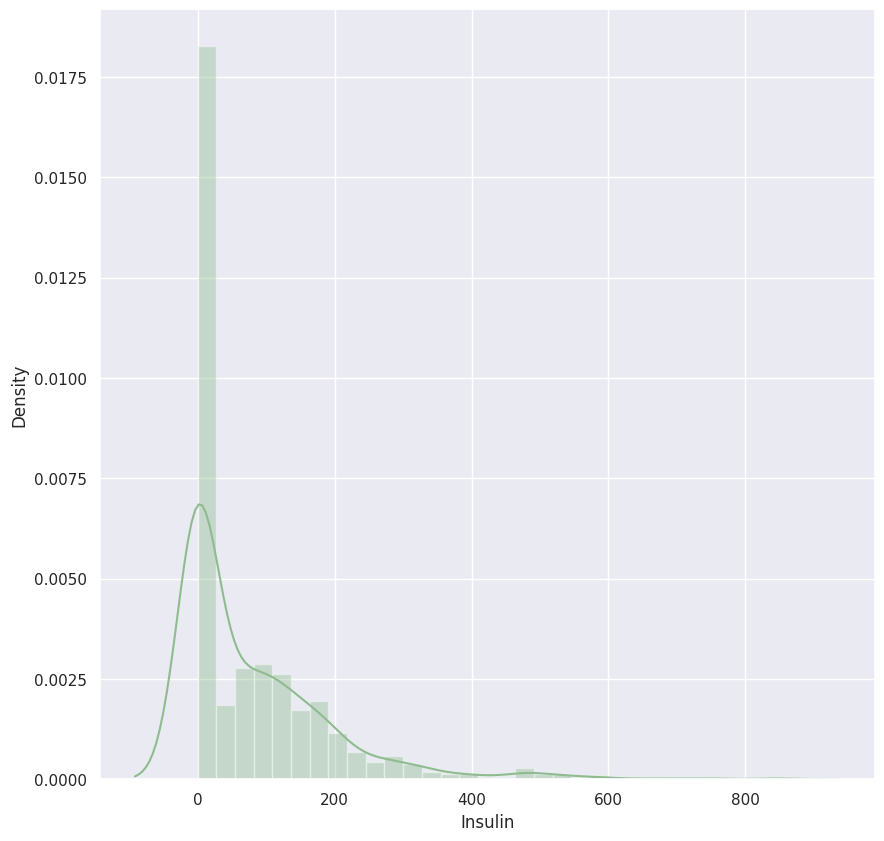

In [13]:
sns.distplot(data['Insulin'],color ="DarkSeaGreen" )

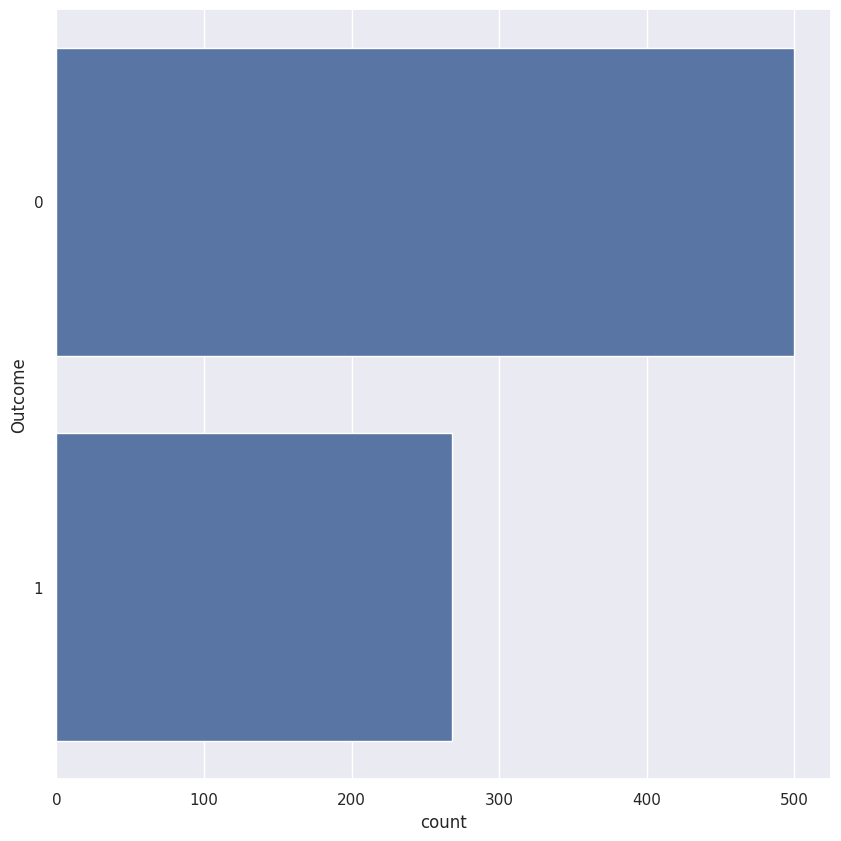

In [14]:
ax = sns.countplot(y="Outcome", data=data)

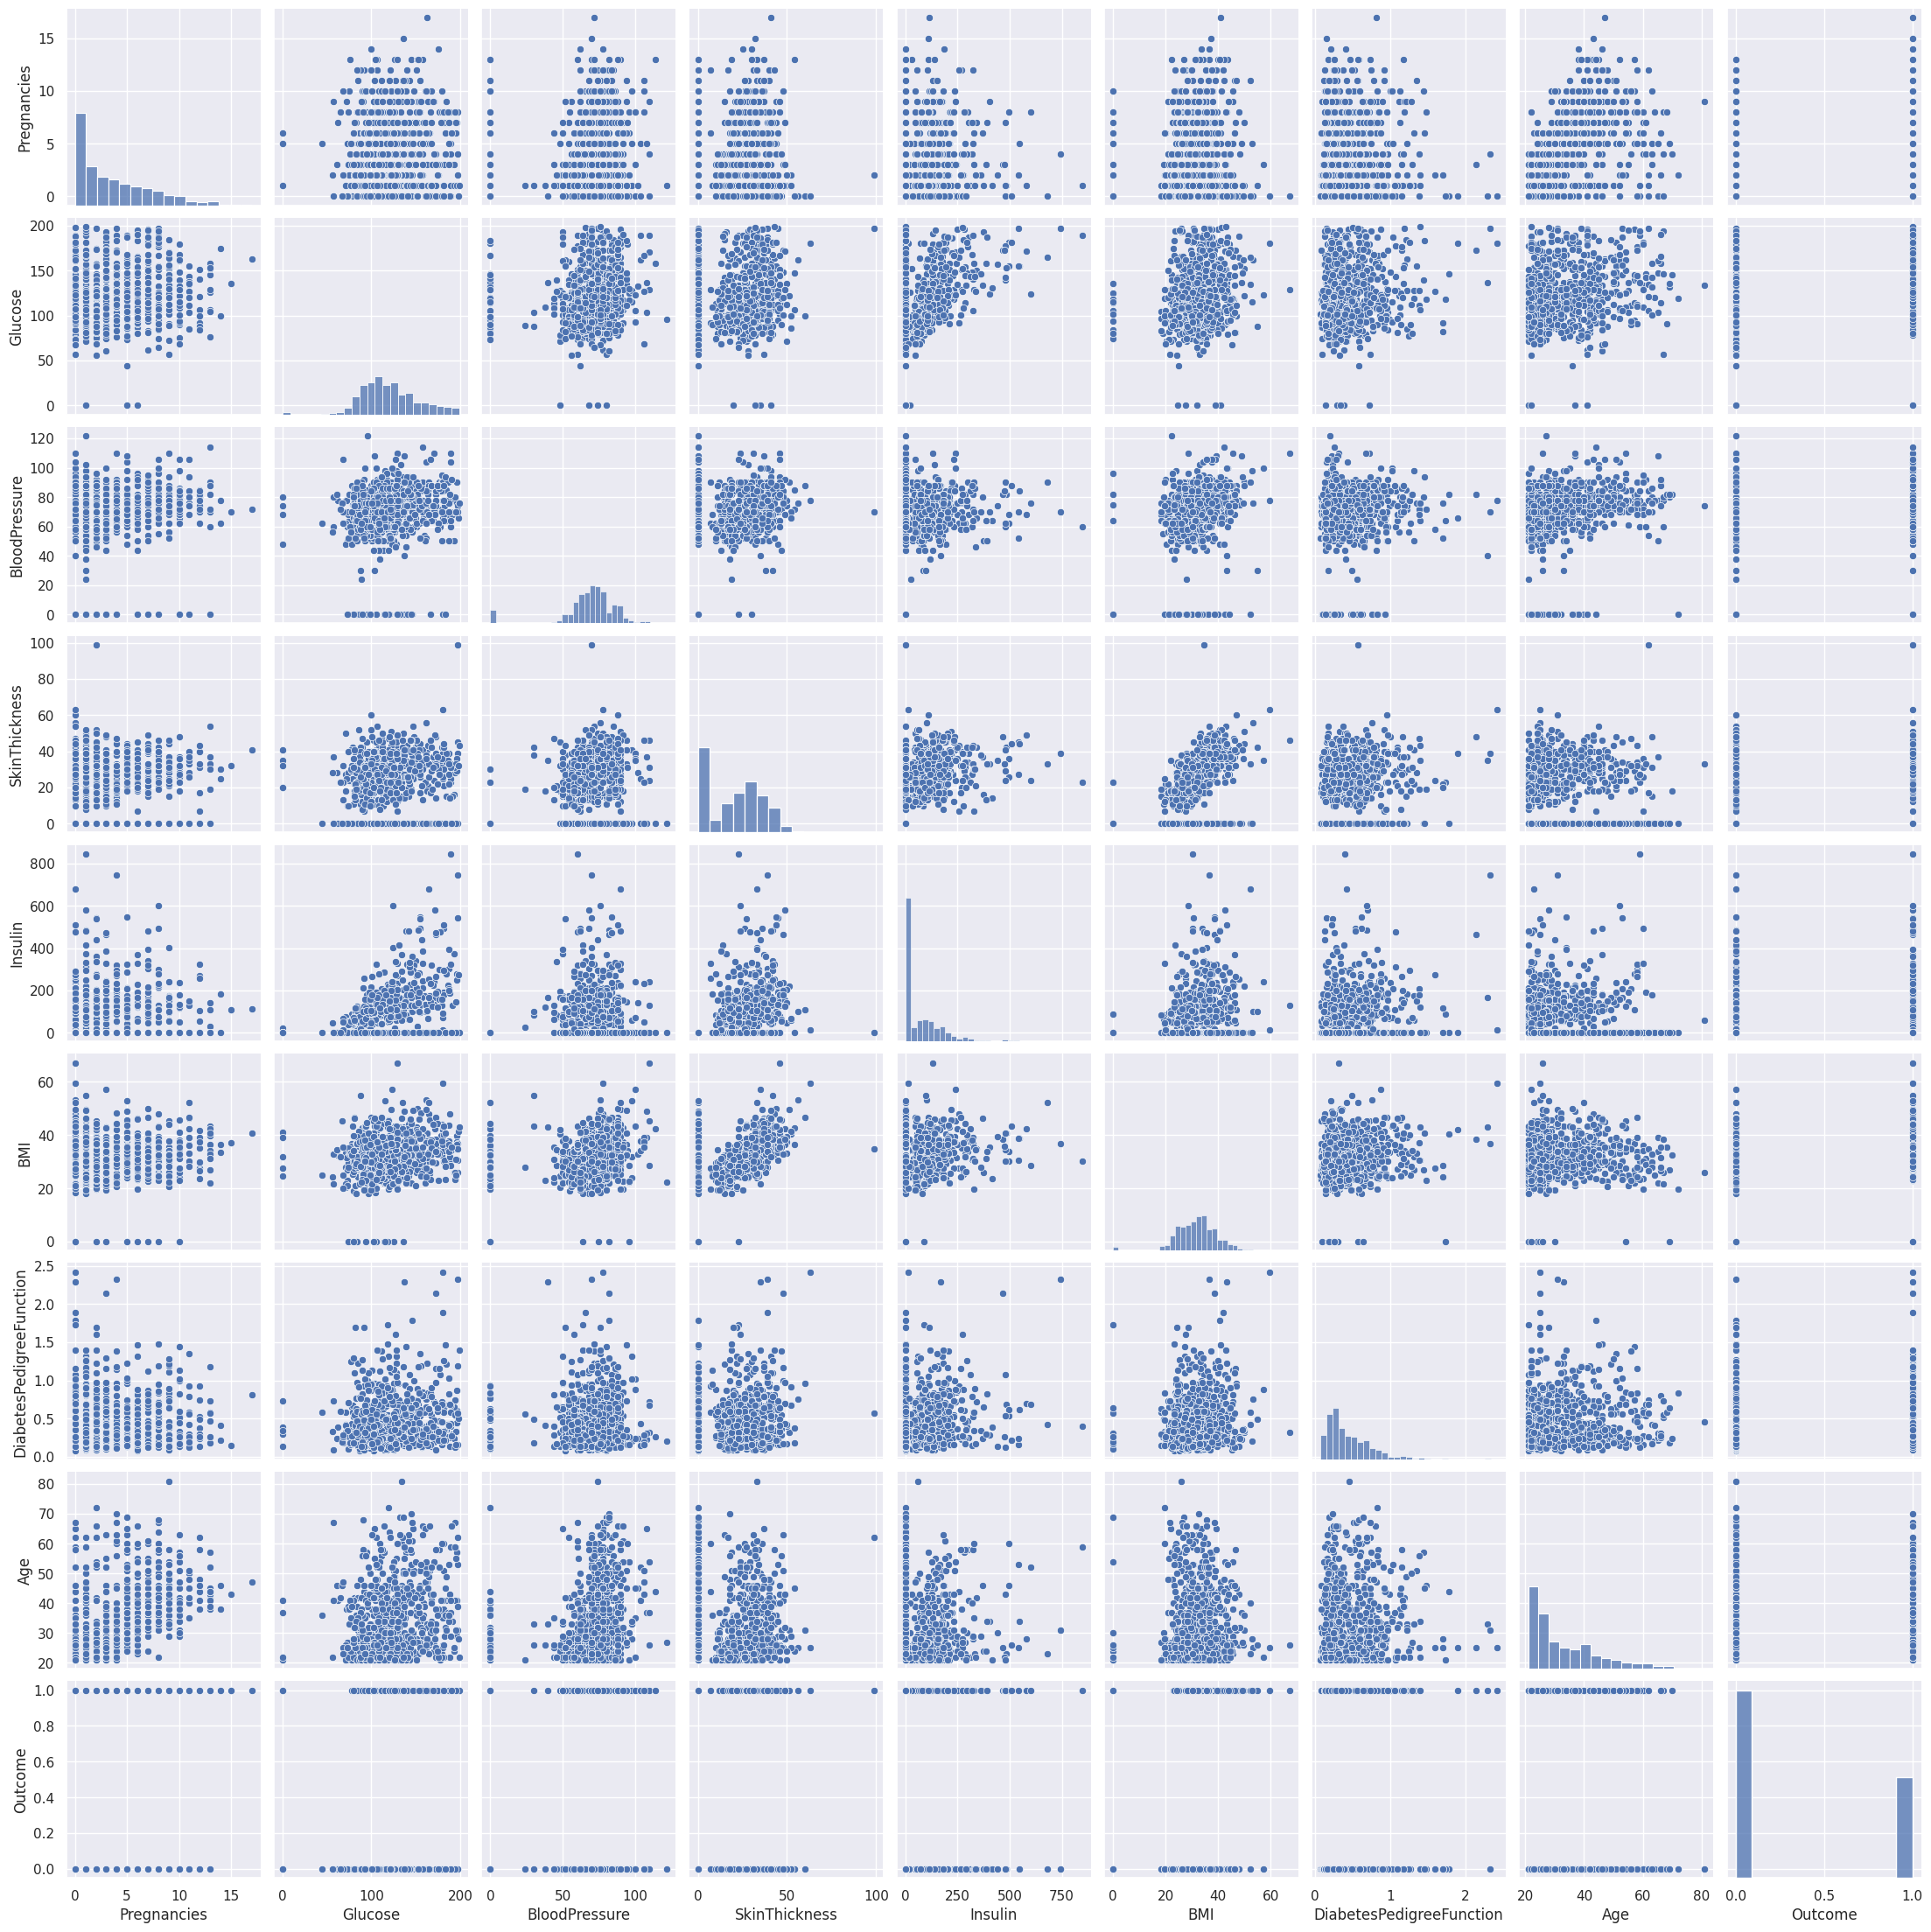

In [15]:
sns.pairplot(data)

# Part 3: Model development

In [16]:
# y includes our target variable and x includes our features
y = data.Outcome
list = ['Outcome']
X = data.drop(list,axis = 1 )
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
# Split the dataset into two sets (Training and Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Classification by using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred1 = knn.predict(X_test)

In [21]:
# Using ROC Curve to assess how well the KNN model fits the dataset
from sklearn import metrics
y_pred_proba1 = knn.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1) # AUC is used to calculate how much of the plot is under the curve

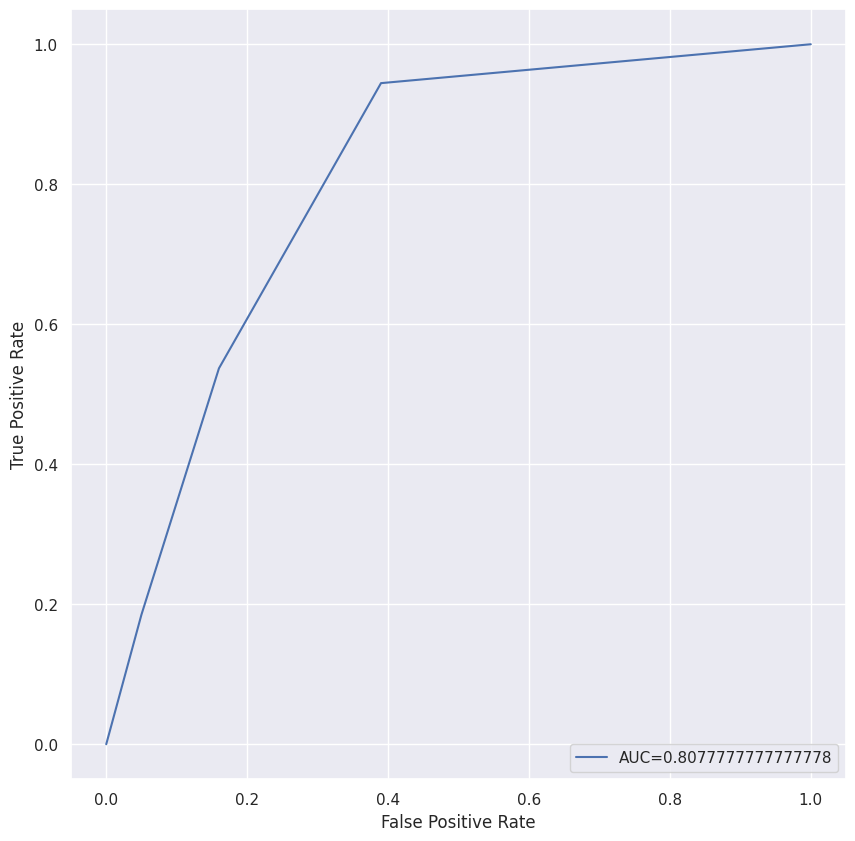

In [22]:
plt.plot(fpr1,tpr1,label="AUC="+str(auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [23]:
# Using accuracy score to check the accuracy of the KNN model
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy of KNN is ", acc1*100, "%")

Accuracy of KNN is  73.37662337662337 %


In [24]:
# Using confusion matrix to visualize the performance of KNN
from sklearn.metrics import confusion_matrix
conf_mat1 = confusion_matrix(y_test, y_pred1)

In [25]:
conf_mat1

array([[84, 16],
       [25, 29]])

In [26]:
# Classification by using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred2 = lr.predict(X_test)

In [29]:
# Using ROC Curve to assess how well the KNN model fits the dataset
from sklearn import metrics
y_pred_proba2 = lr.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2) # AUC is used to calculate how much of the plot is under the curve

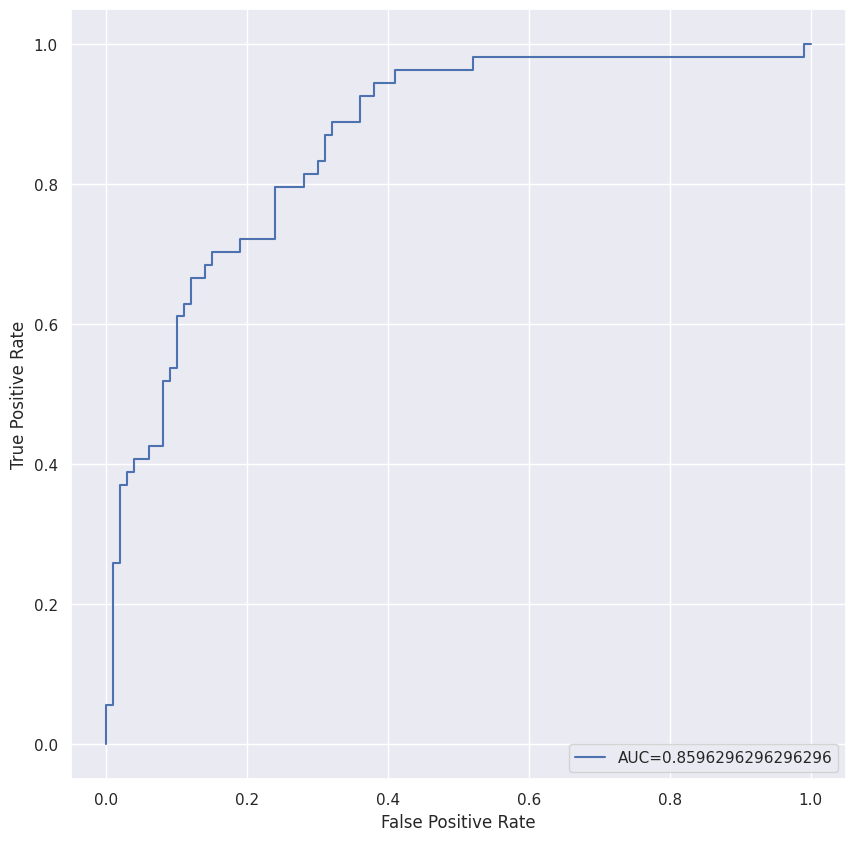

In [30]:
plt.plot(fpr2,tpr2,label="AUC="+str(auc2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [31]:
# Using accuracy score to check the accuracy of the Logistic Regression model
acc2 = accuracy_score(y_test, y_pred2)
print("Accuracy of LR is ", acc2*100, "%")

Accuracy of LR is  79.87012987012987 %


In [32]:
# Using confusion matrix to visualize the performance of KNN
conf_mat2 = confusion_matrix(y_test, y_pred2)
conf_mat2

array([[88, 12],
       [19, 35]])

Text(0, 0.5, 'Percentage (%)')

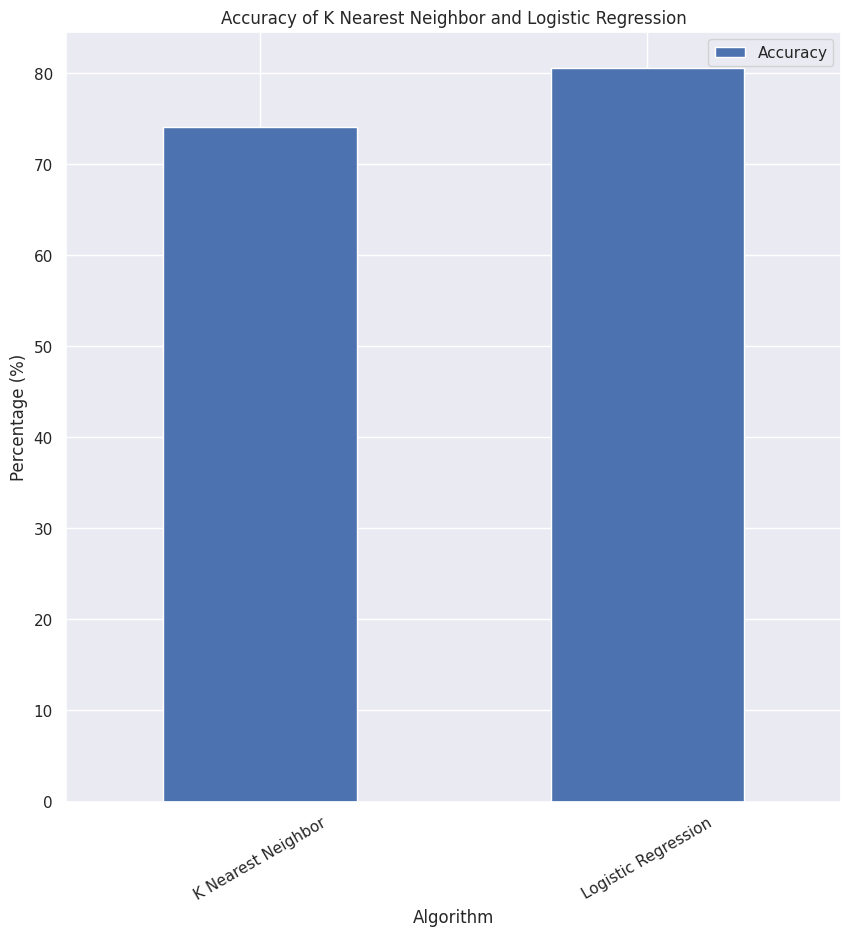

In [33]:
# Visualizing the accuracy of KNN and LR
acc_plot = pd.DataFrame({"Accuracy":[74.03, 80.52]}, index=["K Nearest Neighbor", "Logistic Regression"])
acc_plot.plot(kind="bar")

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Accuracy of K Nearest Neighbor and Logistic Regression")
plt.xlabel("Algorithm")
plt.ylabel("Percentage (%)")

<Axes: title={'center': 'Confusion Matrix of KNN'}>

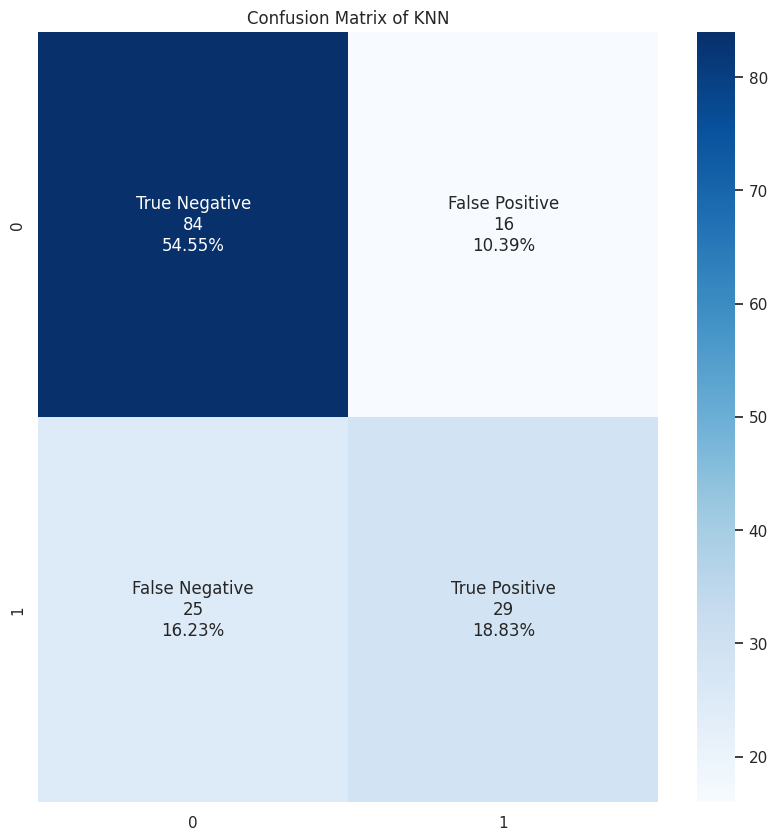

In [34]:
# KNN
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
 conf_mat1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
 conf_mat1.flatten()/np.sum(conf_mat1)]
plt.title('Confusion Matrix of KNN')
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat1, annot=labels, fmt='', cmap='Blues')

<Axes: title={'center': 'Confusion Matrix of Logistic Regression'}>

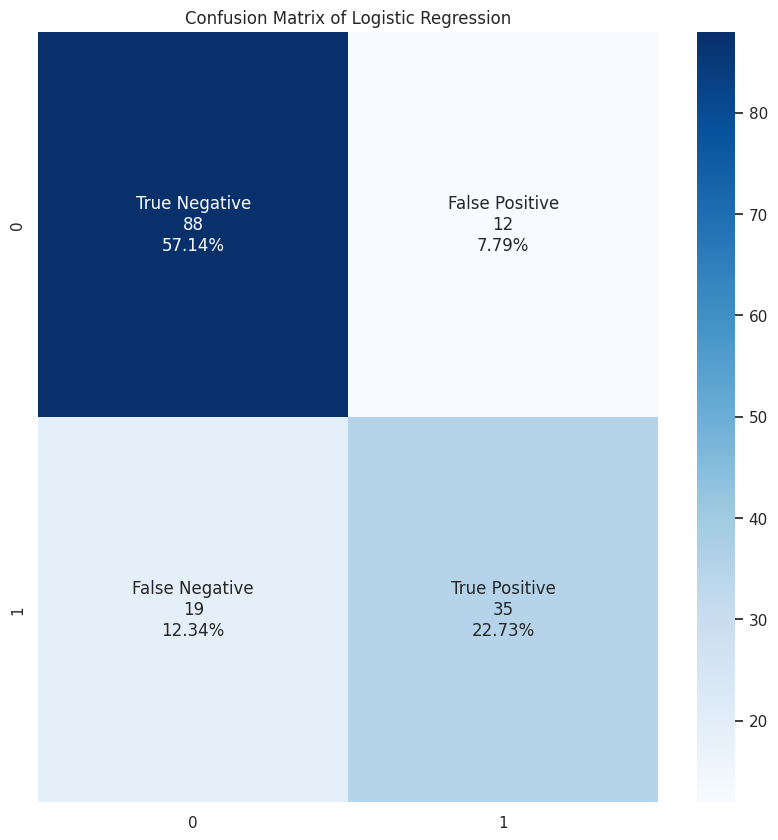

In [35]:
# Logistic Regression
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
 conf_mat2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
 conf_mat2.flatten()/np.sum(conf_mat2)]
plt.title('Confusion Matrix of Logistic Regression')
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat2, annot=labels, fmt='', cmap='Blues')

In [36]:
# Using ANOVA f-test feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=4)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [37]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 35.869756
Feature 1: 157.718940
Feature 2: 1.682070
Feature 3: 2.000439
Feature 4: 11.594776
Feature 5: 43.665935
Feature 6: 19.440584
Feature 7: 42.538188


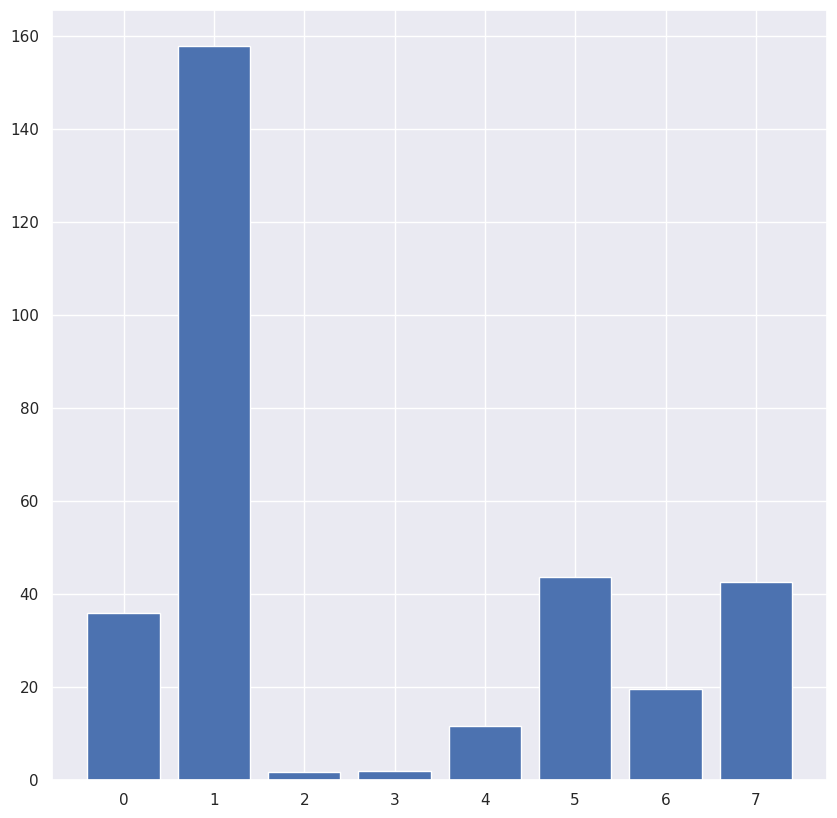

In [38]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_fs, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred1 = knn.predict(X_test_fs)

In [41]:
y_pred_proba1 = knn.predict_proba(X_test_fs)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)

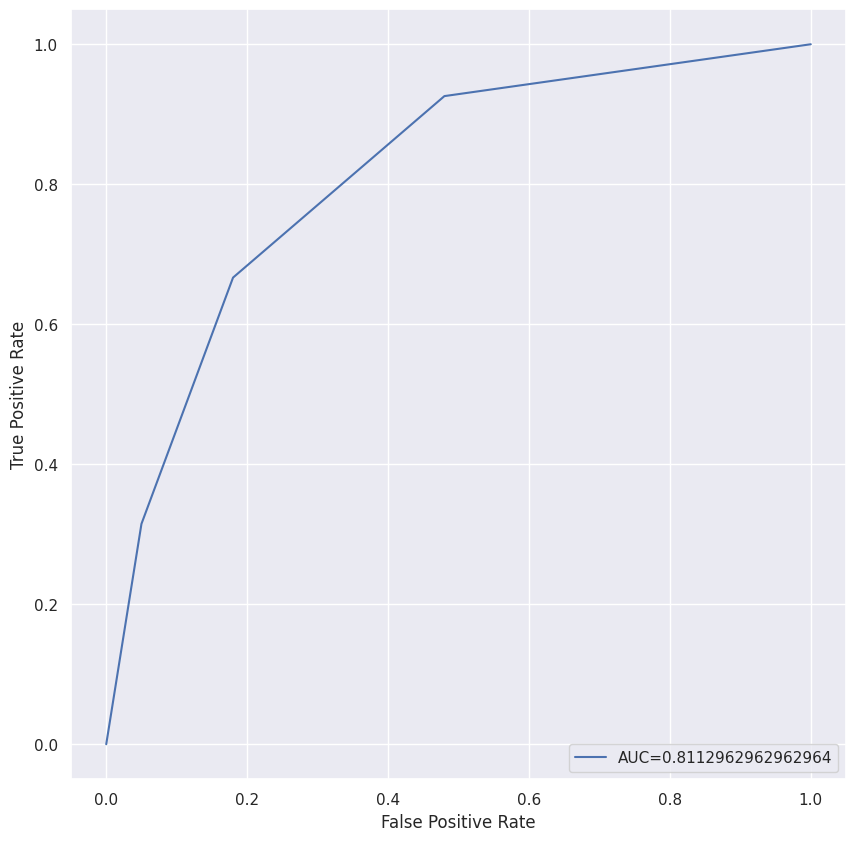

In [42]:
plt.plot(fpr1,tpr1,label="AUC="+str(auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [43]:
acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy of KNN is ", acc1*100, "%")

Accuracy of KNN is  76.62337662337663 %


In [44]:
conf_mat1 = confusion_matrix(y_test, y_pred1)

In [45]:
conf_mat1

array([[82, 18],
       [18, 36]])

In [46]:
lr = LogisticRegression()
lr.fit(X_train_fs, y_train)

LogisticRegression()

In [47]:
y_pred2 = lr.predict(X_test_fs)

In [48]:
y_pred_proba2 = lr.predict_proba(X_test_fs)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)

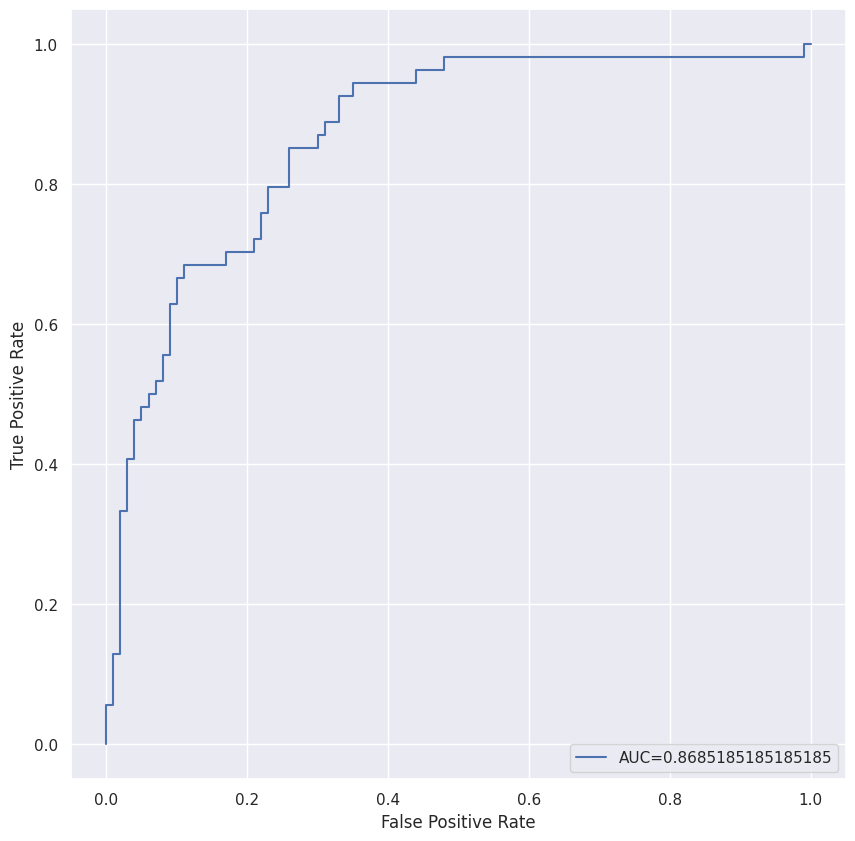

In [49]:
plt.plot(fpr2,tpr2,label="AUC="+str(auc2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [50]:
acc2 = accuracy_score(y_test, y_pred2)
print("Accuracy of LR is ", acc2*100, "%")

Accuracy of LR is  81.81818181818183 %


In [51]:
conf_mat2 = confusion_matrix(y_test, y_pred2)
conf_mat2

array([[90, 10],
       [18, 36]])

Text(0, 0.5, 'Percentage (%)')

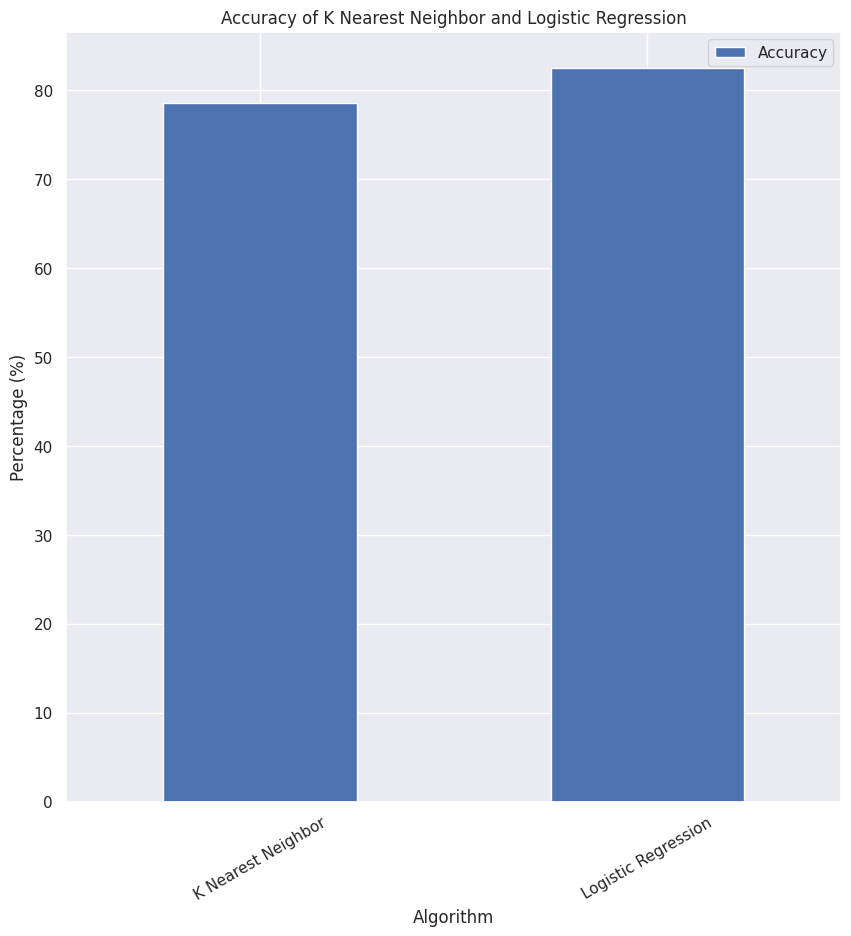

In [52]:
# Visualizing the accuracy of KNN and LR after feature selection
acc_plot = pd.DataFrame({"Accuracy":[78.57, 82.47]}, index=["K Nearest Neighbor", "Logistic Regression"])
acc_plot.plot(kind="bar")

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Accuracy of K Nearest Neighbor and Logistic Regression")
plt.xlabel("Algorithm")
plt.ylabel("Percentage (%)")

<Axes: title={'center': 'Confusion Matrix of KNN'}>

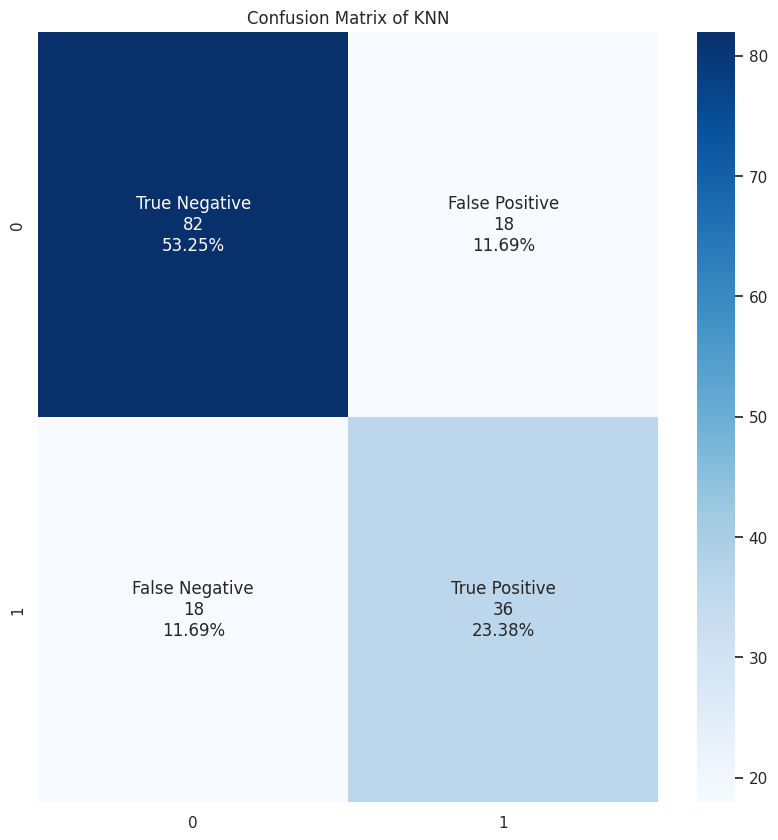

In [53]:
# KNN
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
 conf_mat1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
 conf_mat1.flatten()/np.sum(conf_mat1)]
plt.title('Confusion Matrix of KNN')
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat1, annot=labels, fmt='', cmap='Blues')

<Axes: title={'center': 'Confusion Matrix of Logistic Regression'}>

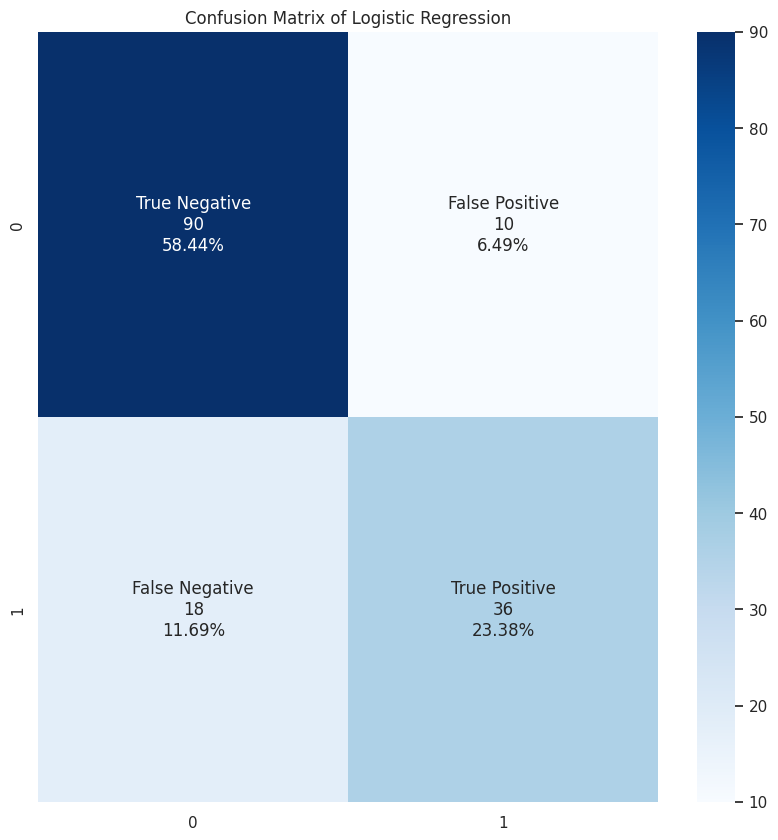

In [54]:
# Logistic Regression
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
 conf_mat2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
 conf_mat2.flatten()/np.sum(conf_mat2)]
plt.title('Confusion Matrix of Logistic Regression')
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat2, annot=labels, fmt='', cmap='Blues')